<a href="https://colab.research.google.com/github/TroyWorkPublic/tibaml0922/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"] , columns=boston["feature_names"])
# type(df["speal length (cm))"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

y = np.array(df["ans"])
# axis參數
x = np.array(df.drop(["ans"], axis=1))
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
# train_test_split([1, 2, 3, 4], ["a", "b", "c", "d"], test_size=0.25)
# numpy: .shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
#學資料->>> .fit
clf.fit(x_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(558.0, 951.3000000000001, 'RM <= 6.92\nmse = 88.068\nsamples = 455\nvalue = 22.744'),
 Text(279.0, 679.5, 'LSTAT <= 14.4\nmse = 41.643\nsamples = 383\nvalue = 19.99'),
 Text(139.5, 407.70000000000005, 'DIS <= 1.385\nmse = 27.864\nsamples = 228\nvalue = 23.396'),
 Text(69.75, 135.89999999999998, '\n  (...)  \n'),
 Text(209.25, 135.89999999999998, '\n  (...)  \n'),
 Text(418.5, 407.70000000000005, 'CRIM <= 6.992\nmse = 19.763\nsamples = 155\nvalue = 14.981'),
 Text(348.75, 135.89999999999998, '\n  (...)  \n'),
 Text(488.25, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 679.5, 'RM <= 7.437\nmse = 80.054\nsamples = 72\nvalue = 37.394'),
 Text(697.5, 407.70000000000005, 'CRIM <= 7.393\nmse = 43.651\nsamples = 43\nvalue = 32.274'),
 Text(627.75, 135.89999999999998, '\n  (...)  \n'),
 Text(767.25, 135.89999999999998, '\n  (...)  \n'),
 Text(976.5, 407.70000000000005, 'PTRATIO <= 19.65\nmse = 37.525\nsamples = 29\nvalue = 44.986'),
 Text(906.75, 135.89999999999998, '\n  (...)  \n'),

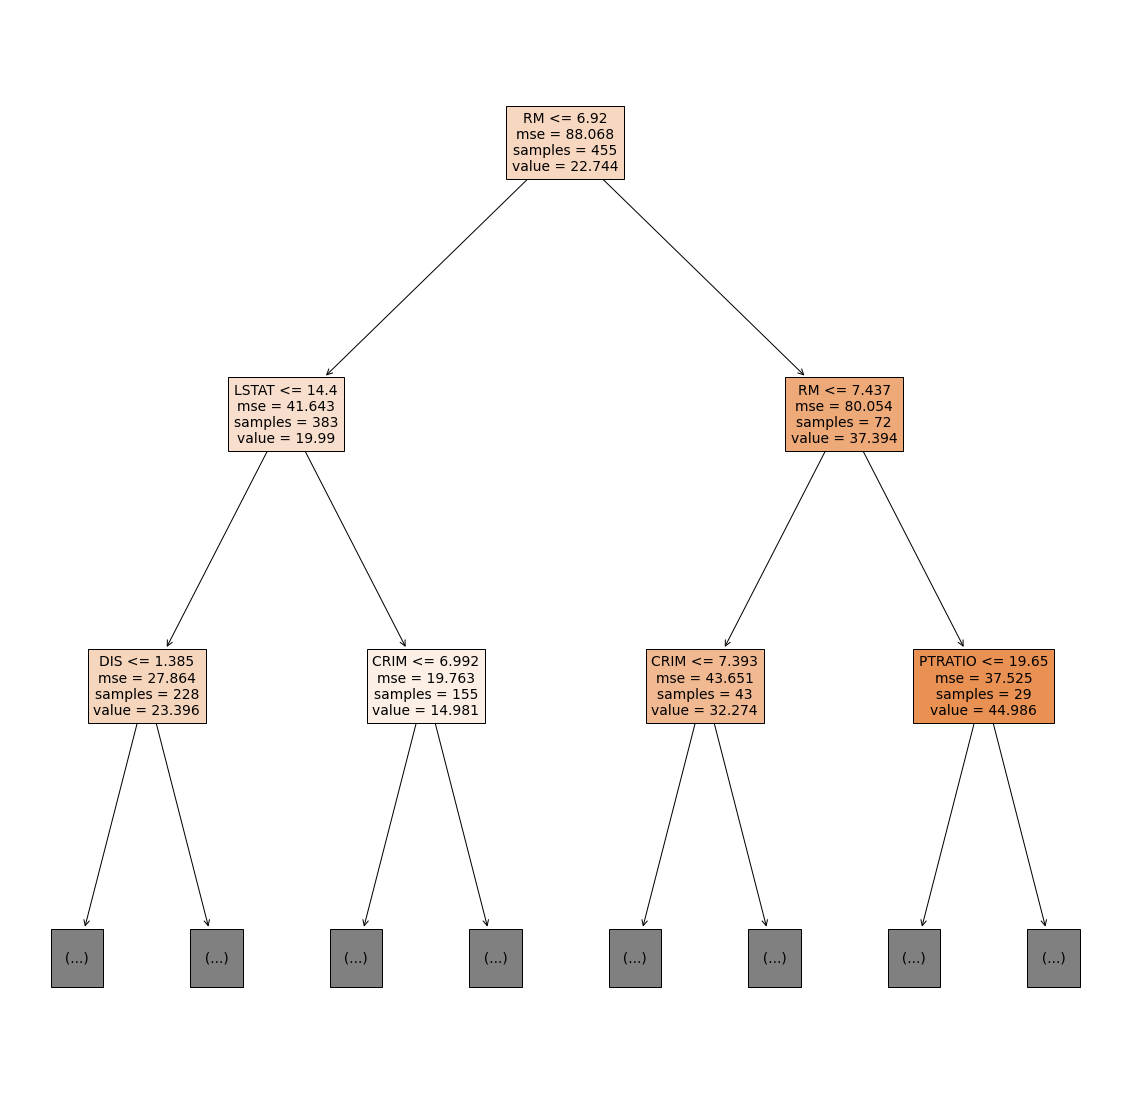

In [ ]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(reg,
          feature_names=boston["feature_names"],
          filled=True,
          max_depth=2)

In [ ]:
 from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.6929127034435232